# Shunique - Company Background
Shunique is a hot new online women's shoe company that is known for their unique shoe combinations.  Founded by auto tire amgnate Joseph Flatbush and his daugthers Jenna and Jamaica.  He believed that just like car tires, women's shoes should be unique and stylish. However, a bold choice to release a "silver vegan leather sandal" that had very few sales has left the company to turn towards their data in search of the next big shoe hit.  The company doesn't know much about their data and have not been keeping up with their monthly, quarterly, and yearly performance.    You were hired as a data analyst to help them answer key questions.  You were given all the shoe sales transactions from Aug 2018 to Aug 2020.  They do know a few statistics:  (1) They have generated \$166,936,995 in total sales since opening (2) The top 3 cities for number of shoes sold are Washington, DC, Houston, Tx, and El Paso, Tx (See Figure below).  They have also provided you with a codebook describing all the columns and their potential values.
<img src="num_shoes_sold_per_city.png">

In [1]:
#Shunique's transactions can be uploaded from the transactions csv file in order for the data to be analyzed.
import pandas as pd
shoes = pd.read_csv("transactions.csv")


In [2]:
#Sometimes the data needs to be cleaned up a bit.
pd.options.display.float_format = '{:,.2f}'.format


In [3]:
shoes.describe()


,quantity,prices,cost
count,"1,105,257.00","1,105,257.00","1,105,257.00"
mean,1.59,94.71,151.04
std,0.94,132.34,261.51
min,1.00,0.01,0.01
25%,1.00,42.00,51.25
50%,1.00,68.00,89.00
75%,2.00,100.00,160.00
max,5.00,"4,270.00","21,350.00"


In [4]:
#The info method identifies what is the datatype of each variable. This will become relevant shortly.
shoes.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1105257 entries, 0 to 1105256
Data columns (total 18 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   first_name       1105257 non-null  object 
 1   last_name        1105257 non-null  object 
 2   email            1105257 non-null  object 
 3   city             1105257 non-null  object 
 4   address          1105257 non-null  object 
 5   state            1105257 non-null  object 
 6   transactionDate  1105257 non-null  object 
 7   transactionID    1105257 non-null  object 
 8   time             1105257 non-null  object 
 9   quantity         1105257 non-null  int64  
 10  name             1105257 non-null  object 
 11  color            1105257 non-null  object 
 12  materials        1105257 non-null  object 
 13  prices           1105257 non-null  float64
 14  feature          1071074 non-null  object 
 15  category         1105257 non-null  object 
 16  cost             1

In [5]:
#The head method is always helpful as it shows the first five rows of the data set.
shoes.head()


,first_name,last_name,email,city,address,state,transactionDate,transactionID,time,quantity,name,color,materials,prices,feature,category,cost,Date
0,Ximenes,Oxshott,xoxshott0@biglobe.ne.jp,Idaho Falls,5 Pearson Plaza,Idaho,04/04/2019,6e3e9c86-2251-44bc-8249-8045e5406cca,7:07 PM,2,'waffle Spa Slide' Slipper (women),green,leather,59.95,recycled material,wedges,119.90,2019-04-04
1,Urson,Wilcox,uwilcox2w@weather.com,Lima,8 Muir Road,Ohio,02/03/2019,aaacafb6-112c-41ad-baf1-44b54b17170b,3:21 AM,1,'waffle Spa Slide' Slipper (women),green,leather,59.95,recycled material,wedges,59.95,2019-02-03
2,Svend,De la Feld,sdelafeld58@last.fm,Wilmington,0 5th Pass,Delaware,07/21/2019,3727a9ae-9914-421c-9adc-eb4f1dd010f4,5:04 AM,2,'waffle Spa Slide' Slipper (women),green,leather,59.95,recycled material,wedges,119.90,2019-07-21
3,Laura,Potts,bmartin@scott-carr.info,Rodriguezmouth,03918 Rachel Meadows Apt. 214,Wisconsin,01/26/2019,649691c5-a77f-4ae2-bee1-4894a03b2dd3,06:26 PM,1,'waffle Spa Slide' Slipper (women),green,leather,59.95,recycled material,wedges,59.95,2019-01-26
4,Alicia,Barker,wduarte@yahoo.com,Port Elijah,5407 Conrad Divide,Arizona,12/13/2019,140995b6-91f1-465f-9491-c7413112a9ee,03:07 AM,5,'waffle Spa Slide' Slipper (women),green,leather,59.95,recycled material,wedges,299.75,2019-12-13


## Question 1

**(1a.)** what was the name of the Best selling shoe and total sales for the Second Fiscal Quarter(Q2) of 2020?

**(1b)**. How did it compare to that shoe's sales in 2019 Q2?  Is it the hottest selling shoe in Q2 2019?  What else can you say about the Q2 2019 versus Q2 2020 performance of this shoe relative to other top sellers during these quarters?  

**Definition of Quarters:**
January, February, and March (Q1)
April, May, and June (Q2)
July, August, and September (Q3)
October, November, and December (Q4) 

## Answers:

The best selling shoe for the second quarter of 2020 was the Mirak Womens Khaki Lace Up Waterproof Walking Boot with total sales of \\$102,480.

For the second quarter of 2019, that shoe had total sales of \\$102,480.  This is the same as the previous year. It was the third best selling shoe during this time period behind the Diamond Eternity Band with \\$138,567 and the Yu&yu Womens Round Toe Chunky Heel Oxfords with \\$133,499, respectively.

The Mirak Womens Khaki Lace Up Waterproof Walking Boot performed the same in both time periods but the Diamond Eternity and Yu&Yu shoes sold lower quantities in 2020 than in 2019 which is probably why the Mirak took the lead.



In [6]:
#The date needs to be converted into a datetime datatype in order to be used in any analysis.
shoes['real_date'] = pd.to_datetime(shoes['Date'])


In [7]:
#Using the info method we can confirm the conversion.
shoes.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1105257 entries, 0 to 1105256
Data columns (total 19 columns):
 #   Column           Non-Null Count    Dtype         
---  ------           --------------    -----         
 0   first_name       1105257 non-null  object        
 1   last_name        1105257 non-null  object        
 2   email            1105257 non-null  object        
 3   city             1105257 non-null  object        
 4   address          1105257 non-null  object        
 5   state            1105257 non-null  object        
 6   transactionDate  1105257 non-null  object        
 7   transactionID    1105257 non-null  object        
 8   time             1105257 non-null  object        
 9   quantity         1105257 non-null  int64         
 10  name             1105257 non-null  object        
 11  color            1105257 non-null  object        
 12  materials        1105257 non-null  object        
 13  prices           1105257 non-null  float64       
 14  fe

In [8]:
#We can filter out the transactions to just show data for the second quarter of 2020.
shoes_2020Q2 = shoes[(shoes['real_date'] >= '4/1/2020') & (shoes['real_date'] <= '6/30/2020')]
shoes_2020Q2.groupby(by='name').sum().sort_values('cost', ascending=False)[:3]


,quantity,prices,cost
name,,,
Mirak Womens 12482-18788 Khaki Lace Up Waterproof Walking Boot 3,24,"68,320.00","102,480.00"
Yu&yu Women's Shoes Round Toe Chunky Heel Oxfords Shoes More Colors Available,630,"46,020.40","69,030.60"
Diamond Eternity Band,15,"54,586.87","62,984.85"


In [9]:
#We can do the same for the second quarter of 2019 to compare the same quarter from both years.
shoes_2019Q2 = shoes[(shoes['real_date'] >= '4/1/2019') & (shoes['real_date'] <= '6/30/2019')]
shoes_2019Q2.groupby(by='name').sum().sort_values('cost', ascending=False)[:3]


,quantity,prices,cost
name,,,
Diamond Eternity Band,33,"83,979.80","138,566.67"
Yu&yu Women's Shoes Round Toe Chunky Heel Oxfords Shoes More Colors Available,1218,"82,836.72","133,459.16"
Mirak Womens 12482-18788 Khaki Lace Up Waterproof Walking Boot 3,24,"72,590.00","102,480.00"


In [10]:
#Below are some descriptive statistics for the top three performing shoe for both time periods.
shoes_2020Q2[shoes_2020Q2['name'] == 'Mirak Womens 12482-18788 Khaki Lace Up Waterproof Walking Boot 3'].describe()


,quantity,prices,cost
count,16.00,16.00,16.00
mean,1.50,"4,270.00","6,405.00"
std,0.82,0.00,"3,486.44"
min,1.00,"4,270.00","4,270.00"
25%,1.00,"4,270.00","4,270.00"
50%,1.00,"4,270.00","4,270.00"
75%,2.00,"4,270.00","8,540.00"
max,3.00,"4,270.00","12,810.00"


In [11]:
shoes_2019Q2[shoes_2019Q2['name'] == 'Mirak Womens 12482-18788 Khaki Lace Up Waterproof Walking Boot 3'].describe()


,quantity,prices,cost
count,17.00,17.00,17.00
mean,1.41,"4,270.00","6,028.24"
std,0.62,0.00,"2,640.34"
min,1.00,"4,270.00","4,270.00"
25%,1.00,"4,270.00","4,270.00"
50%,1.00,"4,270.00","4,270.00"
75%,2.00,"4,270.00","8,540.00"
max,3.00,"4,270.00","12,810.00"


In [12]:
shoes_2020Q2[shoes_2020Q2['name'] == 'Diamond Eternity Band'].describe()


,quantity,prices,cost
count,13.00,13.00,13.00
mean,1.15,"4,198.99","4,844.99"
std,0.55,0.00,"2,329.18"
min,1.00,"4,198.99","4,198.99"
25%,1.00,"4,198.99","4,198.99"
50%,1.00,"4,198.99","4,198.99"
75%,1.00,"4,198.99","4,198.99"
max,3.00,"4,198.99","12,596.97"


In [13]:
shoes_2019Q2[shoes_2019Q2['name'] == 'Diamond Eternity Band'].describe()


,quantity,prices,cost
count,20.00,20.00,20.00
mean,1.65,"4,198.99","6,928.33"
std,1.04,0.00,"4,366.91"
min,1.00,"4,198.99","4,198.99"
25%,1.00,"4,198.99","4,198.99"
50%,1.00,"4,198.99","4,198.99"
75%,2.00,"4,198.99","8,397.98"
max,4.00,"4,198.99","16,795.96"


In [14]:
shoes_2020Q2[shoes_2020Q2['name'] == "Yu&yu Women's Shoes Round Toe Chunky Heel Oxfords Shoes More Colors Available"].describe()


,quantity,prices,cost
count,420.00,420.00,420.00
mean,1.50,109.57,164.36
std,1.03,20.05,118.16
min,1.00,71.27,71.27
25%,1.00,98.13,98.13
50%,1.00,106.54,106.54
75%,1.00,126.18,134.59
max,4.00,182.26,729.04


In [15]:
shoes_2019Q2[shoes_2019Q2['name'] == "Yu&yu Women's Shoes Round Toe Chunky Heel Oxfords Shoes More Colors Available"].describe()


,quantity,prices,cost
count,756.00,756.00,756.00
mean,1.61,109.57,176.53
std,0.83,20.04,97.55
min,1.00,71.27,71.27
25%,1.00,98.13,106.54
50%,1.00,106.54,126.18
75%,2.00,126.18,213.08
max,4.00,182.26,729.04


## Question 2

Over the life of the collected data,

**(2a)** What state has the highest total sales?  

**(2b)** Which state/district/terrritory sold the most shoes over this same period?  

**(2c)** Which state/district/terrritory sold the least number of shoes over this period?

## Answers:

The state with the highest total sales between 2018 and 2020 was Texas with \\$4,046,698. This state also sold the most shoes with 43,399. The state that sold the least number of shoes was District of Columbia with 2,770 which is a drastic drop from the rest of the states with total quantity sold between 33k and 43k.



In [96]:
#We can group and sort the data by any variable including by state and sales.
shoes.groupby(by='state').sum().sort_values('cost', ascending=False)[:10]


,quantity,prices,cost
state,,,
Texas,43399,"2,534,360.26","4,046,697.79"
California,42987,"2,549,023.99","4,040,519.98"
Florida,40655,"2,439,983.57","3,915,786.35"
New York,38431,"2,307,715.10","3,711,601.23"
Virginia,36322,"2,207,662.72","3,506,240.78"
Ohio,36241,"2,149,613.55","3,428,969.07"
Pennsylvania,36092,"2,147,858.78","3,424,010.49"
Michigan,35686,"2,147,653.98","3,423,703.39"
Alabama,35800,"2,144,328.47","3,419,571.87"


In [97]:
#As well as by quantity sold.
shoes.groupby(by='state').sum().sort_values('quantity', ascending=False)[:10]


,quantity,prices,cost
state,,,
Texas,43399,"2,534,360.26","4,046,697.79"
California,42987,"2,549,023.99","4,040,519.98"
Florida,40655,"2,439,983.57","3,915,786.35"
New York,38431,"2,307,715.10","3,711,601.23"
Virginia,36322,"2,207,662.72","3,506,240.78"
Ohio,36241,"2,149,613.55","3,428,969.07"
Pennsylvania,36092,"2,147,858.78","3,424,010.49"
Georgia,35928,"2,124,286.14","3,391,139.71"
Alabama,35800,"2,144,328.47","3,419,571.87"


In [18]:
#We can also sort by ascending order to see the worst performing states.
shoes.groupby(by='state').sum().sort_values('quantity', ascending=True)[:3]


,quantity,prices,cost
state,,,
District of Columbia,2770,"156,416.91","256,872.67"
Wyoming,33244,"1,995,366.07","3,157,960.68"
Hawaii,33382,"1,953,617.98","3,103,894.39"


## Question 3
Jenna Flatbush wants to know what combination of shoes to introduce into low-performing cities.  You came up with the idea that they should start marketing combinations that are already selling well.

**(3.)** What combination of attributes have the most sales? [ color, materials, feature, category ]

## Answers:

Black was the most popular color, leather was the most popular material, diabetic-approved was the most popular feature, and heels was the most popular category. However, the combination of attributes that had the most sales across the whole sales area and time period was the black, leather, travel-friendly, wedge with total sales of \\$881,131. 

In theory, we would want to promote this product more heavily. However, if you look at the worst performing cities, you can see that while it is the second best performing shoe in Wyoming, it isn't even in the top ten of the best performing shoes in DC or Hawaii. So there may be a reason why even this product may not perform well in these cities. DC seems to prefer more boots, possibly due to the colder weather, and Hawaii seems to prefer sandals and sportier shoes since they are more laid back.


In [19]:
#The data can be grouped by color, material, feature, and category.
shoes.groupby(by='color').sum().sort_values('cost', ascending=False)[:3]


,quantity,prices,cost
color,,,
black,511686,"30,341,322.98","48,410,535.70"
white,151941,"9,531,488.85","15,237,603.90"
brown,149552,"8,329,143.81","13,263,530.54"


In [20]:
shoes.groupby(by='materials').sum().sort_values('cost', ascending=False)[:3]


,quantity,prices,cost
materials,,,
leather,803662,"46,601,520.03","74,362,594.03"
fabric,316092,"18,219,946.56","28,970,470.26"
manmade,268689,"15,811,957.36","25,239,023.15"


In [21]:
shoes.groupby(by='feature').sum().sort_values('cost', ascending=False)[:3]


,quantity,prices,cost
feature,,,
diabetic approved,58073,"4,295,899.86","6,852,860.75"
slip resistant,58672,"3,809,505.24","6,069,687.08"
water friendly,59373,"3,724,245.94","5,930,830.76"


In [22]:
shoes.groupby(by='category').sum().sort_values('cost', ascending=False)[:3]


,quantity,prices,cost
category,,,
heels,367137,"21,761,937.55","34,684,750.78"
sandals,300817,"17,909,871.86","28,441,778.42"
wedges,272327,"17,010,098.71","27,235,972.72"


In [23]:
#By using the group by and sort methods, we can see what combination of these four attributes was the best selling product.
shoes.groupby(by=['feature', 'color', 'materials', 'category']).sum().sort_values('cost', ascending=False)[:3]


,,,,quantity,prices,cost
feature,color,materials,category,,,
travel friendly,black,leather,wedges,1423,"529,582.16","881,131.43"
diabetic approved,black,rubber,wedges,167,"461,160.00","713,090.00"
padding,black,leather,heels,2095,"327,130.26","523,562.83"


In [24]:
#Below are the top performing shoes in the three worst performing cities. This information could be used to determine if the best performing product overall could do better in these locations.
shoes[shoes['state'] == 'District of Columbia'].groupby(by=['feature', 'color', 'materials', 'category']).sum().sort_values('cost', ascending=False)[:10]


,,,,quantity,prices,cost
feature,color,materials,category,,,
reflective,black,leather,flats,4,"1,120.00","4,480.00"
fitness tracking,gray,foam,boots,3,"1,390.00","4,170.00"
waterproof,pewter,fabric,boots,3,"1,300.00","3,900.00"
stain-resistant,brown,leather,sandals,2,"1,100.00","2,200.00"
moisture wicking,brown,fabric,loafers,3,"1,330.00","1,995.00"
insulated,white,suede,running,2,995.00,"1,990.00"
non-marking sole,pink,canvas,boots,2,975.00,"1,950.00"
recycled material,black,leather,boots,5,"1,000.97","1,890.97"
handmade,tan,fabric,boots,4,900.00,"1,800.00"


In [25]:
shoes[shoes['state'] == 'Wyoming'].groupby(by=['feature', 'color', 'materials', 'category']).sum().sort_values('cost', ascending=False)[:10]


quantity   prices      cost
feature          color  materials category                             
reflective       black  leather   flats           21 8,551.95 15,983.90
travel friendly  black  leather   wedges          22 9,970.83 14,969.72
padding          black  leather   heels           55 9,180.86 14,305.68
wearable tech    black  leather   sandals         60 6,278.74 12,286.99
                                  heels           47 6,013.96 10,800.84
water resistant  silver canvas    heels            8 5,400.00 10,800.00
moisture wicking black  leather   heels           27 6,399.72  9,255.52
stain-resistant  blue   fabric    wedges          10 4,475.00  8,950.00
lightweight      gray   fabric    sandals          6 5,800.00  8,700.00
slip resistant   brown  suede     wedges          11 3,750.00  8,250.00

In [26]:
shoes[shoes['state'] == 'Hawaii'].groupby(by=['feature', 'color', 'materials', 'category']).sum().sort_values('cost', ascending=False)[:10]


,,,,quantity,prices,cost
feature,color,materials,category,,,
collapsible back,gray,leather,heels,12,"5,060.02","10,035.02"
seamless,tan,leather,sandals,5,"9,875.00","9,875.00"
AFO Friendly,brown,fabric,heels,17,"5,413.96","9,843.96"
reflective,black,leather,sandals,29,"5,027.01","8,982.89"
diabetic approved,black,rubber,wedges,2,"8,540.00","8,540.00"
recycled material,burgundy,nylon,basketball,10,"3,400.00","8,500.00"
AFO Friendly,white,suede,skateboarding,9,"4,824.00","8,409.00"
puncture resistant,orange,fabric,skateboarding,10,"3,180.00","7,950.00"
collapsible back,black,wool,skateboarding,7,"2,190.00","7,665.00"


## Question 4

Jamaica Flatbush is unsure of how Shunique performed last year (2019). 

**(4a)** What were total sales?

**(4b)** Plot daily, monthly, quarterly sales for 2019. 

**(4c)** Are there any trends? 

**(4d)** In the monthly sales data, describe a significant event (ie. increase or decrease in sales) and hypothesize(make a wild guest) about its existence? What additional evidence(data) would be needed to support or negate your hypothesis.

## Answers:

Shunique's total sales for 2019 were \\$87,005,120. 

See below for the daily, monthly, and quarterly sales charts for 2019. 

As you can see, as we entered the last quarter we saw a jump in sales. As Q4 is the winter in the US, this increase could be due to a larger number of transactions, possibly of more expensive shoes (e.g. winter boots vs summer slippers). We could prove this assumption if we showed the change in the number of transactions, the change in the quantities per transaction, and/or the change in prices. We did this in the tables below which shoes that the average number of shoes purchased per transaction increased while average prices remained the same causing sales revenue to increase.



In [27]:
#Sometimes looking at tables of data isn't enough. We can use this data to create charts to visualize the data.
shoes_2019 = shoes[(shoes['real_date'] >= '1/1/2019') & (shoes['real_date'] <= '12/31/2019')]


In [28]:
print(f'Total sales for 2019 were ${shoes_2019["cost"].sum():,.2f}.')


Total sales for 2019 were $87,005,120.81.


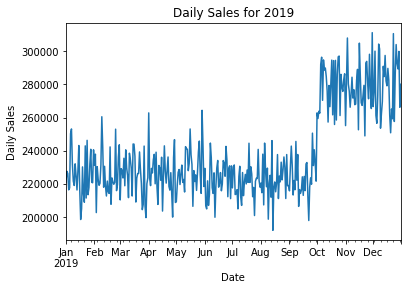

In [29]:
#Below is a chart of the daily sales for 2019
shoes_2019P = shoes[(shoes['real_date'] >= '1/1/2019') & (shoes['real_date'] <= '12/31/2019')].set_index('real_date')
daily_2019 = shoes_2019P.groupby(pd.Grouper(freq='D'))['cost'].sum()
ax = daily_2019.plot()
ax.set_title('Daily Sales for 2019')
ax.set_ylabel('Daily Sales')
ax.set_xlabel('Date');


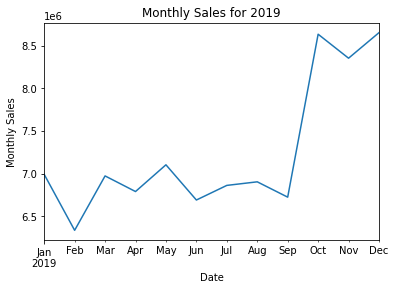

In [30]:
#This is a chart of the monthly sales for 2019
monthly_2019 = shoes_2019P.groupby(pd.Grouper(freq='M'))['cost'].sum()
ax = monthly_2019.plot()
ax.set_title('Monthly Sales for 2019')
ax.set_ylabel('Monthly Sales')
ax.set_xlabel('Date');


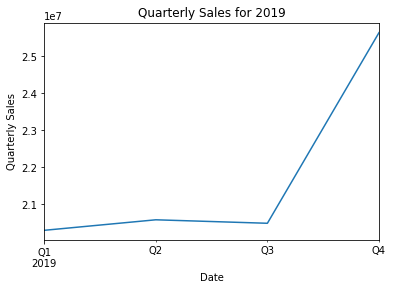

In [31]:
#This is a chart of the quarterly sales for 2019
quarterly_2019 = shoes_2019P.groupby(pd.Grouper(freq='Q'))['cost'].sum()
ax = quarterly_2019.plot()
ax.set_title('Quarterly Sales for 2019')
ax.set_ylabel('Quarterly Sales')
ax.set_xlabel('Date');


In [32]:
#These tables show the average quantity per transaction per month, average prices, and total transactions, respectively.
quant_2019 = shoes_2019['quantity'].groupby(shoes_2019['real_date'].dt.to_period('M')).mean()
quant_2019


real_date
2019-01   1.55
2019-02   1.55
2019-03   1.55
2019-04   1.55
2019-05   1.56
2019-06   1.54
2019-07   1.55
2019-08   1.54
2019-09   1.55
2019-10   1.90
2019-11   1.90
2019-12   1.91
Freq: M, Name: quantity, dtype: float64

In [33]:
prices_2019 = shoes_2019['prices'].groupby(shoes_2019['real_date'].dt.to_period('M')).mean()
prices_2019


real_date
2019-01   95.25
2019-02   94.87
2019-03   94.50
2019-04   95.12
2019-05   95.31
2019-06   94.24
2019-07   93.28
2019-08   94.45
2019-09   94.74
2019-10   95.66
2019-11   95.34
2019-12   96.15
Freq: M, Name: prices, dtype: float64

In [34]:
trans_2019 = shoes_2019['transactionID'].groupby(shoes_2019['real_date'].dt.to_period('M')).count()
trans_2019

real_date
2019-01    47538
2019-02    43047
2019-03    47724
2019-04    46064
2019-05    47791
2019-06    46102
2019-07    47354
2019-08    47211
2019-09    45662
2019-10    47389
2019-11    46246
2019-12    46884
Freq: M, Name: transactionID, dtype: int64

## Question 5

As we are approaching the winter months, Mr. Flatbush is sure that heels will be a big seller.  He wants to know if we are on track to outperform our past sales of heels (based on previous 2 months performance June 2020 and July 2020)? 

**(5a)** Create a regression model based on daily sales of heels for this time period. 

**(5b)** State and interpret the regression equation. 

**(5c)** Use your model to make a prediction for the sales on 8/1/2020.

## Answers:

Below is the regression model for daily sales of heels for June and July of 2020.

In plain language, regression equation tells us that the next quantity sold will be 481.61 plus an additional 0.387 for each shoe in the transaction. The correlation coefficient tells us that the linear relationship between quantity and date is slightly positive. As you can see, the line is almost flat indicating that it has a weak predictive capability.

However, based on this model we could predict that sales on 8/1/2020 would be 505.


In [35]:
#The next two formulas separate out the data for heels sales during June and July of 2020.
heels = shoes[shoes['category'] == 'heels']


In [36]:
heels_past = heels[(heels['real_date'] >= '6/1/2020') & (heels['real_date'] <= '7/31/2020')]


In [37]:
#In order to plot a regression analysis, the transaction dates need to be converted into an index.
day_index = heels_past.set_index('real_date').groupby(pd.Grouper(freq='D')).sum()
day_index


,quantity,prices,cost
real_date,,,
2020-06-01,504,"32,682.63","52,981.70"
2020-06-02,488,"29,650.92","48,162.57"
2020-06-03,481,"28,652.81","46,850.94"
2020-06-04,463,"31,955.47","47,053.19"
2020-06-05,451,"28,776.68","44,860.54"
...,...,...,...
2020-07-27,486,"28,970.67","45,848.56"
2020-07-28,517,"33,012.97","55,211.02"
2020-07-29,607,"32,984.51","55,410.23"


In [38]:
#The above index then needs to be converted into a list so that it can be referenced in the chart.
x= list(range(0,day_index.shape[0]))


In [39]:
from scipy import stats

import matplotlib as mpl  # Python's most widely used plotting library
import matplotlib.pyplot as plt  # A module that allows you to modify aspects of a plot
import seaborn as sns  # The most popular statistics-focused plotting library

%matplotlib inline
%config InlineBackend.figure_format = 'retina'


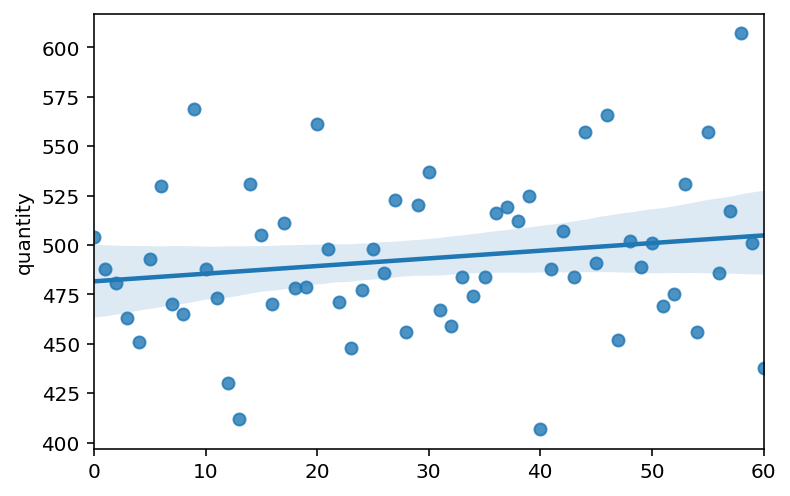

In [40]:
#The beloe regression plot shows the correlation between the total daily quantity of shoes sold and the date index.
sns.regplot(x=x, y='quantity', data=day_index)
plt.show()


In [41]:
#The equation for the regression line can also be extrapolated.
lin_reg = stats.linregress(x=x, y=day_index['quantity'])
print(lin_reg)


LinregressResult(slope=0.38730830248545756, intercept=481.6102591221576, rvalue=0.18153043863302853, pvalue=0.16147427743927542, stderr=0.27315242944006063)


In [42]:
slope = lin_reg[0]
intercept = lin_reg[1]
r_value = lin_reg[2]
print(f"y = {slope: .3f}x + {intercept: .3f}")
print(f"Correlation Coefficient r: {r_value}")


y =  0.387x +  481.610
Correlation Coefficient r: 0.18153043863302853


In [43]:
#Using the regression equation, we can predict future quantities sold.
august_quant = (slope * 62) + intercept
print(f'The next daily quantity of shoes sold based on our regression equation would be {august_quant:.0f}.')


The next daily quantity of shoes sold based on our regression equation would be 506.


## Question 6

A key metric for retail sales data is Average Purchase Value(APV).  APV measures the average value of each purchase made by your customers and will often compare that to the average number of units per transaction(ANU). The formula for APV is (Total Sales Revenue / Number of Customers or Transactions)

**(6a).** Calculate the Average Purchase Value for Q1 and Q4 of 2019.

**(6b).** Calculate the average number of units per transaction for Q1 and Q4

**(6c).** Describe the differences between Q1 and Q4 values.  Speculate on possible causes for differences(Hint: Seasonality)

## Answers:

The average purchase values for Q1 and Q4 of 2019 were \\$146.75 and \\$182.56, respectively.

The average number of units per transaction for the same periods were 1.12 and 1.35, respectively.

As you can see, total sales revenue increased, total transactions increased, and average quantity per transaction increased between Q1 and Q4 of 2019. This could be due to a larger number of purchases with a larger number of products to prepare for the colder, winter months.



In [44]:
#Below are the average purchase values and the average number of units per transaction for Q1 and Q4 2019.
total_revQ1 = shoes[(shoes['real_date'] >= '1/1/2019') & (shoes['real_date'] <= '3/31/2019')]['cost'].sum()
total_revQ1


20297301.230000004

In [45]:
total_transQ1 = shoes[(shoes['real_date'] >= '1/1/2019') & (shoes['real_date'] <= '3/31/2019')]['transactionID'].count()
total_transQ1


138309

In [46]:
APV_2019Q1 = total_revQ1/total_transQ1
print(f'The APV for Q1 2019 is ${APV_2019Q1:.2f}.')


The APV for Q1 2019 is $146.75.


In [47]:
total_revQ4 = shoes[(shoes['real_date'] >= '10/1/2019') & (shoes['real_date'] <= '12/31/2019')]['cost'].sum()
total_revQ4


25638526.060000002

In [48]:
total_transQ4 = shoes[(shoes['real_date'] >= '10/1/2019') & (shoes['real_date'] <= '12/31/2019')]['transactionID'].count()
total_transQ4


140519

In [49]:
APV_2019Q4 = total_revQ4/total_transQ4
print(f'The APV for Q4 2019 is ${APV_2019Q4:.2f}.')


The APV for Q4 2019 is $182.46.


In [50]:
total_quantQ1 = shoes[(shoes['real_date'] >= '1/1/2019') & (shoes['real_date'] <= '3/31/2019')]['quantity'].mean()
total_quantQ1
print(f'The ANU for Q1 2019 is {total_quantQ1:.2f}.')


The ANU for Q1 2019 is 1.55.


In [51]:
total_quantQ4 = shoes[(shoes['real_date'] >= '10/1/2019') & (shoes['real_date'] <= '12/31/2019')]['quantity'].mean()
total_quantQ4
print(f'The ANU for Q4 2019 is {total_quantQ4:.2f}.')


The ANU for Q4 2019 is 1.90.


## Question 7

Shunique is looking to expand its distribution centers so that it can outperform Zappos on delivery time to customers.  It is important to know what states and regions are epicenters for high sales and you have been asked to present the following results.

**(7a)** Report 2020 Sales by state - Present results tabularly 

**(7b)** In Tableau create a Map visualization of total sales(2018 - 2020) by Region [Northeast, West, Midwest, South].

## Answers:


See below for tables showing total sales by state and region as well as a map visualization created in Tableau. The table with all states shows that two of the top five and five of the top ten states are in the south. The other three and five, respectively, are spread across the other regions. As you can see from the map, the southern region has the highest sales revenue.

It is worth noting that there are more southern states than in any other region. However, even if we move the potentially questionable DC, Maryland, and Delaware to the northern region, the south would still have the highest sales revenue.



In [52]:
#We can also look at sales sorted by state to determine what area performs better. 
shoes_2020 = shoes[(shoes['real_date'] >= '1/1/2020') & (shoes['real_date'] <= '12/31/2020')]


In [53]:
shoes_2020.groupby(by='state').sum().sort_values('cost', ascending=False)


,quantity,prices,cost
state,,,
Texas,13273,"805,415.02","1,238,215.58"
California,12905,"780,505.85","1,219,721.54"
Florida,11929,"734,357.36","1,143,359.72"
New York,11579,"703,725.58","1,074,477.72"
Ohio,10556,"648,858.71","1,021,461.58"
Virginia,10457,"656,489.34","1,009,027.82"
Oklahoma,10425,"634,248.40","996,220.92"
Washington,10396,"639,168.33","994,863.51"
Georgia,10434,"633,150.60","988,708.06"


In [54]:
#We can use the isin method to create subset groups including georgraphic regions consisting of states.
Northeast = shoes_2020[shoes_2020['state'].isin(["Maine", "New Hampshire", "Vermont", "Connecticut", "Rhode Island", "New York", "New Jersey", "Massachusetts", "Pennsylvania"])].groupby(by='state').sum().sort_values('cost', ascending=False)
Northeast


,quantity,prices,cost
state,,,
New York,11579,"703,725.58","1,074,477.72"
Pennsylvania,10328,"632,450.33","979,018.40"
New Jersey,9901,"606,543.80","949,132.92"
Massachusetts,9838,"606,837.60","941,206.10"
Connecticut,9979,"606,022.39","936,879.80"
Vermont,9640,"599,522.96","918,529.74"
Rhode Island,9620,"584,644.72","910,977.66"
New Hampshire,9473,"593,838.59","908,548.09"
Maine,9377,"577,054.13","881,449.26"


In [55]:
West = shoes_2020[shoes_2020['state'].isin(["Washington", "Oregon", "Montana", "California", "New Mexico", "Arizona", "Nevada", "Utah", "Alaska", "Hawaii", "Idaho", "Wyoming"])].groupby(by='state').sum().sort_values('cost', ascending=False)
West


,quantity,prices,cost
state,,,
California,12905,"780,505.85","1,219,721.54"
Washington,10396,"639,168.33","994,863.51"
Nevada,10027,"631,718.90","965,571.65"
New Mexico,9886,"591,570.47","941,271.88"
Utah,9855,"602,505.20","939,794.05"
Arizona,10064,"612,766.94","933,061.96"
Idaho,9969,"590,731.91","924,232.08"
Oregon,9744,"596,381.03","910,181.02"
Montana,9567,"582,332.78","897,348.35"


In [56]:
Midwest = shoes_2020[shoes_2020['state'].isin(["Illinois", "Indiana", "Iowa", "Kansas", "Michigan", "Minnesota", "Missouri", "Nebraska", "North Dakota", "South Dakota", "Ohio", "Wisconsin"])].groupby(by='state').sum().sort_values('cost', ascending=False)
Midwest


,quantity,prices,cost
state,,,
Ohio,10556,"648,858.71","1,021,461.58"
Indiana,10195,"631,815.29","980,345.53"
Illinois,10126,"619,215.64","974,058.97"
Minnesota,9960,"623,344.06","960,446.90"
Wisconsin,10036,"625,440.19","960,293.69"
Iowa,10063,"620,896.07","958,326.67"
Michigan,10274,"623,440.87","955,762.10"
Missouri,10104,"606,088.41","928,030.66"
Kansas,9789,"595,473.39","926,168.33"


In [57]:
South = shoes_2020[shoes_2020['state'].isin(["Alabama", "Arkansas", "Delaware", "Florida", "Georgia", "Kentucky", "Louisiana", "Maryland", "Mississippi", "North Carolina", "Oklahoma", "South Carolina", "Tennessee", "Texas", "Virginia", "West Virginia", "District of Columbia"])].groupby(by='state').sum().sort_values('cost', ascending=False)
South


,quantity,prices,cost
state,,,
Texas,13273,"805,415.02","1,238,215.58"
Florida,11929,"734,357.36","1,143,359.72"
Virginia,10457,"656,489.34","1,009,027.82"
Oklahoma,10425,"634,248.40","996,220.92"
Georgia,10434,"633,150.60","988,708.06"
Alabama,10396,"630,779.97","974,686.32"
Louisiana,10040,"619,976.90","965,760.25"
Tennessee,10225,"625,189.71","962,034.79"
North Carolina,10274,"610,996.20","959,069.53"


In [58]:
#Using Tableau we can visualize the data displayed in the tables above.

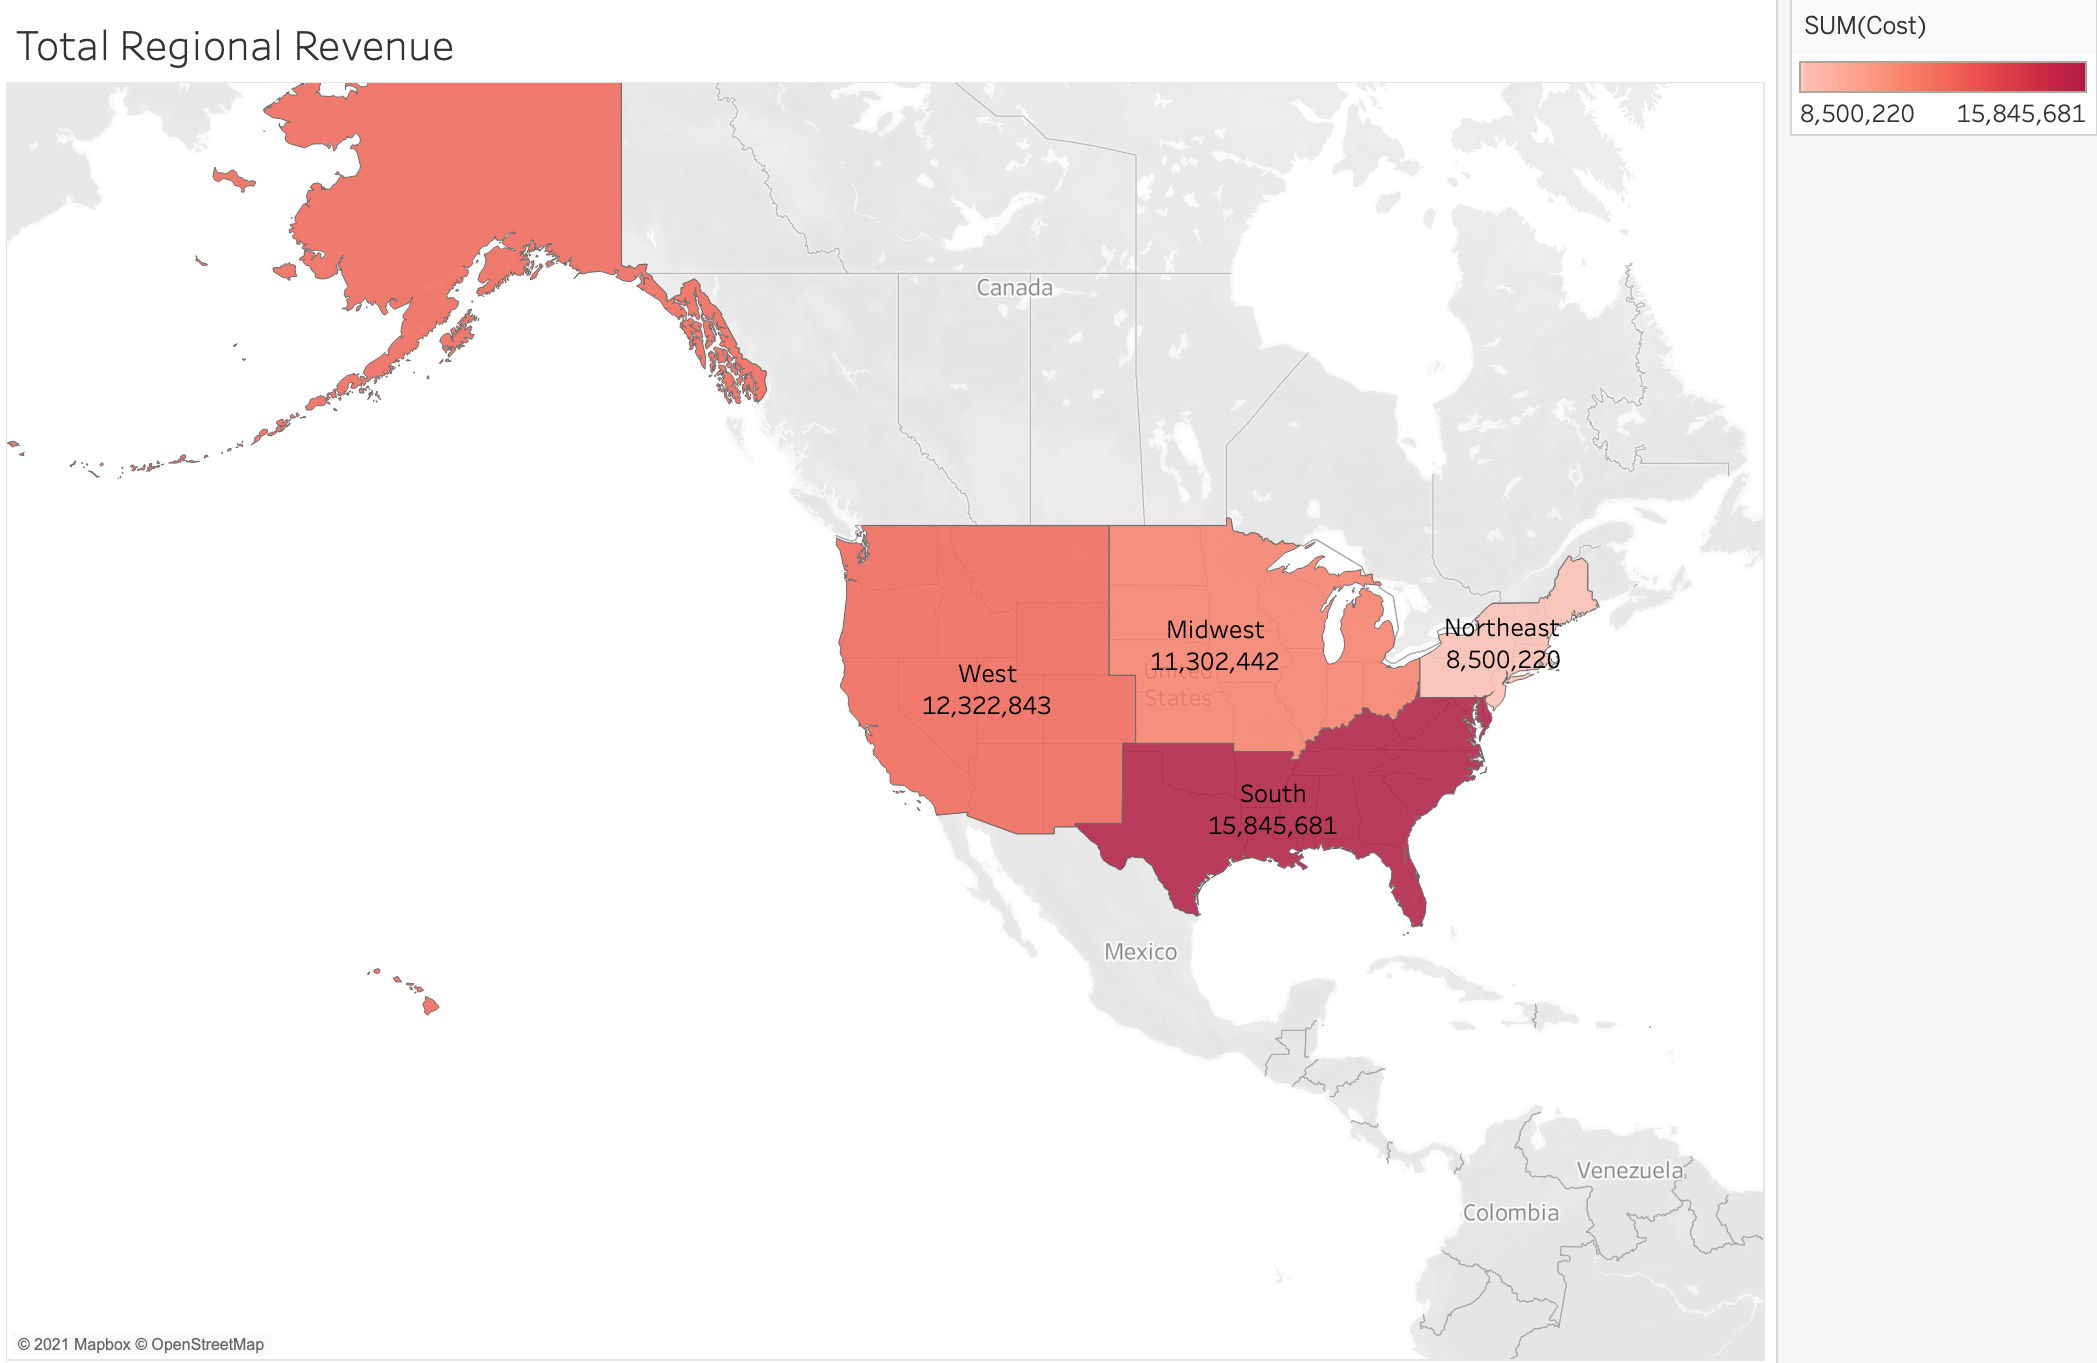

## Question 8

Use any type of plot to show the distribution of prices for the following shoe colors ('metallic', 'bronze', 'animal print', 'yellow')

## Answers:


See below for charts showing the distribution of prices for shoes in metallic, bronze, animal print, and yellow. It appears the majority of prices are less than \\$250. 

All four colors have the same distribution of prices with skews to the right. This was caused by extreme values (sales above \\$250). Based on the plots below, there appears to be more sales in animal print and yellow. 


In [59]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import seaborn as sns

%config InlineBackend.figure_format = 'retina'


In [60]:
#To compare the price distributions for shoes of different colors, we must first create separate variables representing those colors.
metallic = shoes[(shoes['color'] == "metallic")]


In [61]:
bronze = shoes[(shoes['color'] == "bronze")]


In [62]:
animal = shoes[(shoes['color'] == "animal print")]


In [63]:
yellow = shoes[(shoes['color'] == "yellow")]


/Users/jadkaram/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


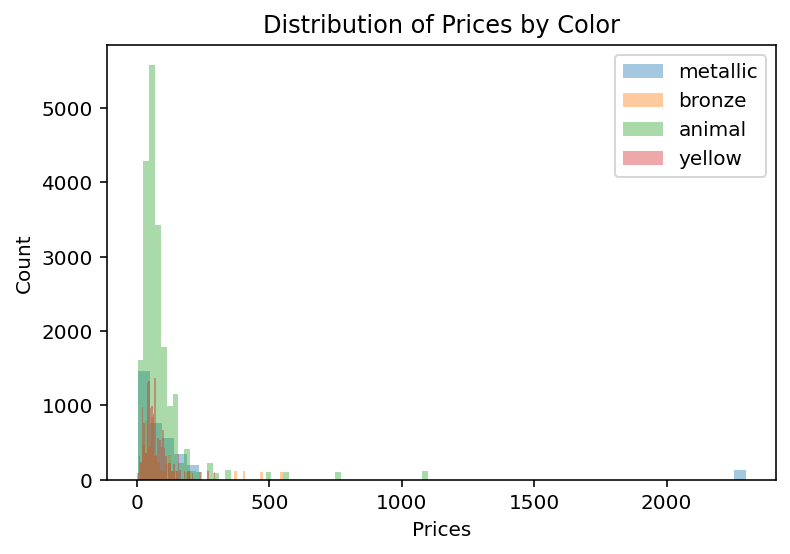

In [64]:
ax = sns.distplot(metallic['prices'], label="metallic", kde=False)
sns.distplot(bronze['prices'], label="bronze", kde=False)
sns.distplot(animal['prices'], label="animal", kde=False)
sns.distplot(yellow['prices'], label="yellow", kde=False)
ax.set(xlabel='Prices', ylabel='Count', title='Distribution of Prices by Color')
plt.legend()
plt.show();


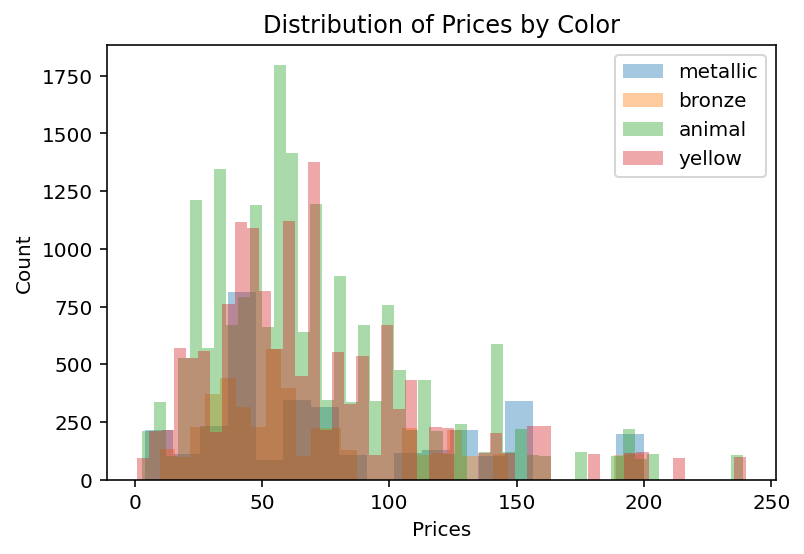

In [65]:
ax = sns.distplot(metallic['prices'][metallic['prices'] < 250], label="metallic", kde=False)
sns.distplot(bronze['prices'][bronze['prices'] < 250], label="bronze", kde=False)
sns.distplot(animal['prices'][animal['prices'] < 250], label="animal", kde=False)
sns.distplot(yellow['prices'][yellow['prices'] < 250], label="yellow", kde=False)
ax.set(xlabel='Prices', ylabel='Count', title='Distribution of Prices by Color')
plt.legend()
plt.show();


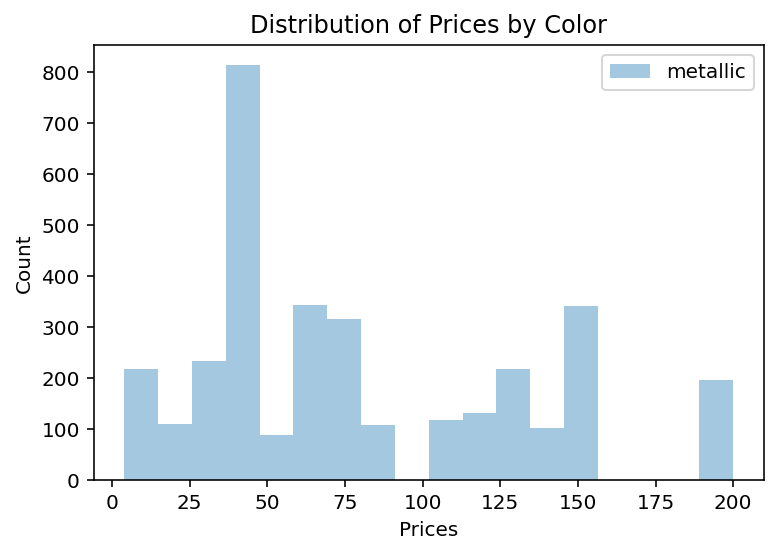

In [66]:
ax = sns.distplot(metallic['prices'][metallic['prices'] < 250], label="metallic", kde=False)
ax.set(xlabel='Prices', ylabel='Count', title='Distribution of Prices by Color')
plt.legend()
plt.show();


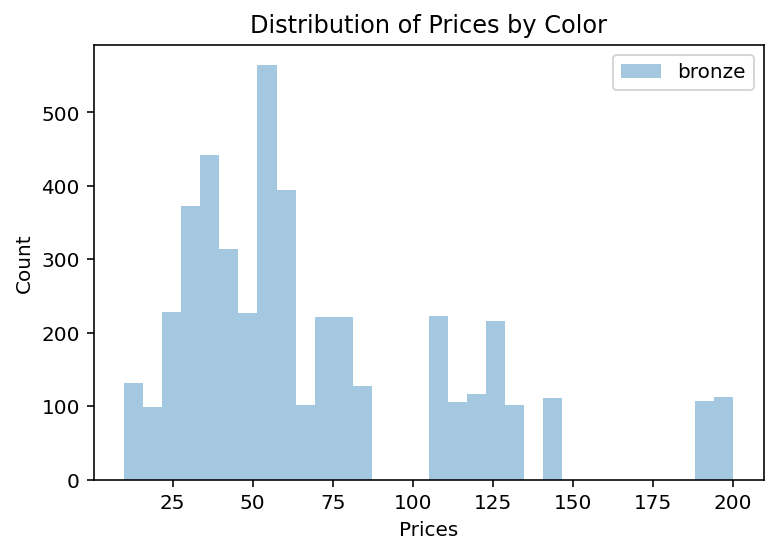

In [67]:
ax = sns.distplot(bronze['prices'][bronze['prices'] < 250], label="bronze", kde=False)
ax.set(xlabel='Prices', ylabel='Count', title='Distribution of Prices by Color')
plt.legend()
plt.show();


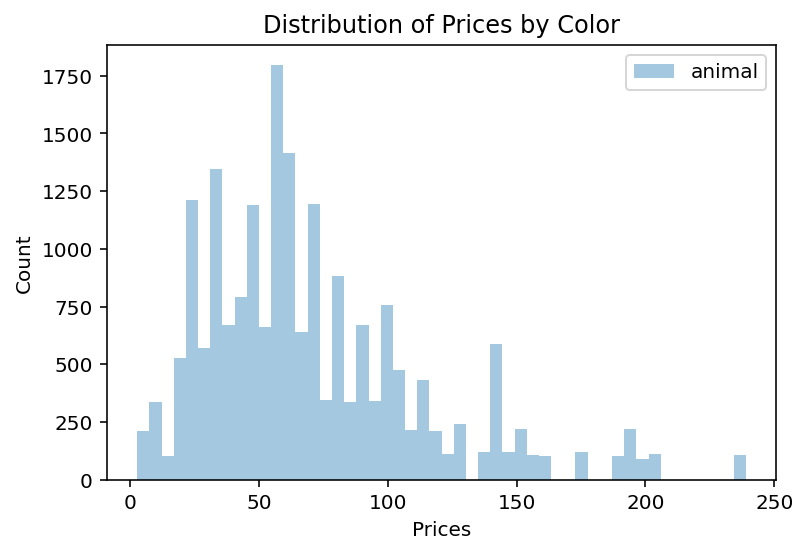

In [68]:
ax = sns.distplot(animal['prices'][animal['prices'] < 250], label="animal", kde=False)
ax.set(xlabel='Prices', ylabel='Count', title='Distribution of Prices by Color')
plt.legend()
plt.show();


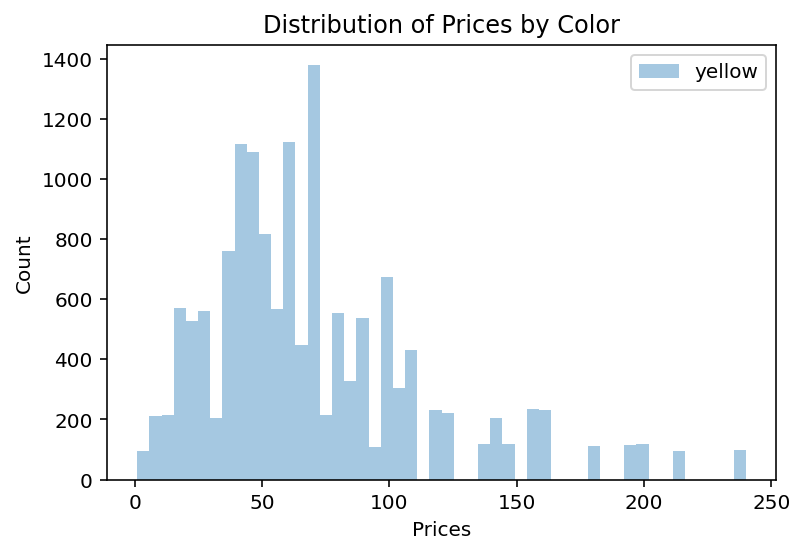

In [69]:
ax = sns.distplot(yellow['prices'][yellow['prices'] < 250], label="yellow", kde=False)
ax.set(xlabel='Prices', ylabel='Count', title='Distribution of Prices by Color')
plt.legend()
plt.show();


## Question 9

The Shunique marketing team is desperate to find the next big shoe hit.  They have asked for your help. 

**(9a)** Select a unique combination of shoe attributes then create a summary report with various statistics (ie Average sales price, city with most sales, quarter with most shoes sold, Customer name with highest purchase, etc)[it is your choice].  If the shoe combo doesn't exist in the dataset then choose another combination.

Next quarter they are going to release an animal print, leather, strappy, basketball shoe.  

## Answers:

The shoe with the highest quantity sold is the black, leather, orthopedic heels but it is only thirteenth in sales. I believe it would be a great choice to improve its sales potential.

The average sales price for this shoe type is \\$84.34 which is below the average sales price for all shoes at \\$94.71. Its highest sales of \\$4k come from Indiana. Its sales have been pretty steady at about \\$13k per quarter except for roughly a 40% dip in the first quarter of 2020. February of 2020 was its worst year. Its most valuable customer is Ruth Francis, who is from Indiana.


In [70]:
#This is the list of the top 20 best selling shoes by sales.
shoes.groupby(by=['feature', 'color', 'materials', 'category']).sum().sort_values('cost', ascending=False)[:20]


,,,,quantity,prices,cost
feature,color,materials,category,,,
travel friendly,black,leather,wedges,1423,"529,582.16","881,131.43"
diabetic approved,black,rubber,wedges,167,"461,160.00","713,090.00"
padding,black,leather,heels,2095,"327,130.26","523,562.83"
strappy,metallic,nubuck,wedges,206,"294,400.00","473,800.00"
wearable tech,black,leather,sandals,1858,"251,163.59","409,756.96"
leather outsole,blue,leather,heels,1031,"253,160.28","392,687.85"
moisture wicking,black,leather,heels,1394,"233,097.73","376,990.20"
slip resistant,black,leather,sandals,1125,"220,815.67","350,745.54"
wearable tech,black,leather,heels,2203,"194,350.81","326,628.14"


In [71]:
#This is the list of the top 20 best selling shoes by quantity.
shoes.groupby(by=['feature', 'color', 'materials', 'category']).sum().sort_values('quantity', ascending=False)[:20]


,,,,quantity,prices,cost
feature,color,materials,category,,,
orthotic friendly,black,leather,heels,2633,"171,829.83","274,180.80"
lightweight,black,leather,heels,2343,"144,900.29","225,432.68"
diabetic approved,black,leather,sandals,2264,"187,252.30","287,794.98"
stain-resistant,black,leather,wedges,2245,"176,656.81","274,825.44"
insulated,black,leather,heels,2214,"113,574.12","176,892.08"
wearable tech,black,leather,heels,2203,"194,350.81","326,628.14"
water friendly,black,leather,heels,2202,"177,492.31","272,224.49"
vegan,black,leather,heels,2145,"78,686.66","124,851.35"
insulated,black,leather,boots,2113,"83,142.87","135,461.15"


In [72]:
unique = shoes[(shoes['color'] == 'black') & (shoes['materials'] == 'leather') & (shoes['category'] == 'heels') & (shoes['feature'] == 'orthopedic')]


In [73]:
#This is a list of the top 20 best selling black, leather, orthopedic heels.
unique.groupby(by='name').sum().sort_values('cost', ascending=False)[:20]


,quantity,prices,cost
name,,,
Women's Diba True What To Do Riding Boot Off White Suede,171,"28,435.05","40,860.45"
Women's Trotters Estee Nude Soft Patent Leather,164,"12,995.00","21,311.80"
Journee Collection Women's 'Emm' Open Toe Faux Suede Booties by Journee Collection,180,"6,888.94","11,698.20"
Women's Flex Trainer 5 Training Shoe,157,"6,375.00","9,812.50"
Born Women's Clarice Leather Taupe Ankle-high Leather Sandal - 7m,153,"4,543.08","6,814.62"
Carlos By Carlos Santana Women's Libra Dress Pump,160,"1,286.01","2,078.40"
Op Women's Polka Dot Eva Sandal,159,790.02,"1,268.82"


In [74]:
unique.describe()


,quantity,prices,cost
count,727.00,727.00,727.00
mean,1.57,84.34,129.08
std,0.91,77.71,147.41
min,1.00,7.98,7.98
25%,1.00,12.99,38.97
50%,1.00,62.50,64.99
75%,2.00,129.95,194.97
max,5.00,238.95,955.80


In [76]:
#These are the states and cities with the most sales of this shoe type.
unique.groupby(by='state').sum().sort_values('cost', ascending=False)[:3]


,quantity,prices,cost
state,,,
Indiana,31,"2,783.98","4,057.24"
Arizona,40,"2,037.99","3,374.16"
Kentucky,27,"2,149.38","3,160.13"


In [77]:
unique.groupby(by='city').sum().sort_values('cost', ascending=False)[:3]


,quantity,prices,cost
city,,,
New Hannah,4,238.95,955.80
Port Daniel,4,238.95,955.80
Gabrielmouth,4,238.95,955.80


In [78]:
#This is the monthly, quarterly, and yearly sales for this shoe type.
monthly_sales = unique['cost'].groupby(unique['real_date'].dt.to_period('M')).sum()
monthly_sales


real_date
2018-08   3,777.44
2018-09   3,623.40
2018-10   3,413.74
2018-11   4,199.02
2018-12   2,831.72
2019-01   5,674.93
2019-02   3,312.34
2019-03   4,712.84
2019-04   3,877.71
2019-05   3,229.96
2019-06   5,446.36
2019-07   4,032.19
2019-08   4,183.80
2019-09   4,095.23
2019-10   6,304.47
2019-11   3,117.12
2019-12   3,698.76
2020-01   3,500.27
2020-02   1,987.81
2020-03   2,390.37
2020-04   3,471.50
2020-05   5,178.31
2020-06   4,815.25
2020-07   2,925.71
2020-08      44.54
Freq: M, Name: cost, dtype: float64

In [79]:
quarterly_sales = unique['cost'].groupby(unique['real_date'].dt.to_period('Q')).sum()
quarterly_sales


real_date
2018Q3    7,400.84
2018Q4   10,444.48
2019Q1   13,700.11
2019Q2   12,554.03
2019Q3   12,311.22
2019Q4   13,120.35
2020Q1    7,878.45
2020Q2   13,465.06
2020Q3    2,970.25
Freq: Q-DEC, Name: cost, dtype: float64

In [80]:
yearly_sales = unique['cost'].groupby(unique['real_date'].dt.to_period('Y')).sum()
yearly_sales


real_date
2018   17,845.32
2019   51,685.71
2020   24,313.76
Freq: A-DEC, Name: cost, dtype: float64

In [81]:
#These are the top three customers by sales and quantity sold, respectively.
unique.groupby(['last_name','first_name']).sum().sort_values('cost', ascending=False)[:3]


,,quantity,prices,cost
last_name,first_name,,,
Francis,Ruth,4,238.95,955.80
Lopez,Bradley,4,238.95,955.80
White,Paul,4,238.95,955.80


In [82]:
unique.groupby(['last_name','first_name']).sum().sort_values('quantity', ascending=False)[:5]


,,quantity,prices,cost
last_name,first_name,,,
Brown,James,5,89.08,222.70
Wood,Brent,5,12.99,64.95
Smith,Ryan,5,7.98,39.90
Whitney,Allison,5,44.54,222.70
Lopez,Bradley,4,238.95,955.80


In [83]:
#We can see that the customer with the highest sales lives in Indiana but their last transaction date was in 2018. 
print(unique.loc[(unique['last_name'] == 'Francis') & (unique['first_name'] == 'Ruth')])


      first_name last_name                           email          city  \
34836       Ruth   Francis  walkerjeffrey@bishop-smith.com  Gabrielmouth   

                  address    state transactionDate  \
34836  8548 Courtney Walk  Indiana      11/04/2018   

                              transactionID      time  quantity  \
34836  aa2f3efa-0643-4c28-8888-df2ae4db7033  03:52 PM         4   

                                                    name  color materials  \
34836  Women's Diba True What To Do Riding Boot Off W...  black   leather   

       prices     feature category   cost        Date  real_date  
34836  238.95  orthopedic    heels 955.80  2018-11-04 2018-11-04  


## Question 10

**(10a)** Are there opportunities to grow sales?  

**(10b)** Are there products that you would discontinue? 

**(10c)** What other datasets would you use to complement the transaction data and why?

## Answers:


There are always opportunities to grow sales. A few ideas include increasing marketing for the best performing shoes (especially in underperforming areas), offering discounts or lowering prices on shoes in order to increase the quantities sold, and/or targeting loyal customers with special offers.

There are also ways to cut expenses like discontinuing shoes that aren't performing well. The first shoe I would discontinue is the Guess Ortena Bronze/Black Ankle Boot. It has the lowest sales of all the shoes in stock and the price is listed at only $0.99. To support the decision to discontinue this product, you would need to show that the costs associated with the product outweigh the sales.

This data set would complemented by including the costs for manufacturing, distribution, marketing, and storage of the shoes.


In [84]:
shoes.groupby(by='name').sum().sort_values('cost', ascending=True)[:10]


,quantity,prices,cost
name,,,
Guess Ortena2 Bronze/black Ankle Booties Boots Size 6.5,181,0.99,1.81
Bcbgeneration Anais Women Us 6.5 Tan Thong Sandal Pre Owned Blemish 1665,140,93.06,138.60
"Trotters 1650 Womens Black Patent Leather Heels Pumps Shoes 7 Wide (c,d,w) Bhfo",148,89.10,146.52
Kenneth Cole Reactio Slim Shake Women Us 7.5 Black Pre Owned 1654,154,102.96,152.46
Kensie Veronica Women Us 8.5 Blue Sneakers Pre Owned 1906,167,101.97,165.33
Bella Vita Sangria Women Us 7.5 N/s White Wedge Sandal Blemish 1903,176,113.85,174.24
Nina Falana-vg Women Us 6 Silver Sandals Pre Owned 1904,182,114.84,180.18
Mix No 6 Sarti Women Us 8 Green Platform Heel Pre Owned 1650,186,118.80,184.14
Alfani Hannia Women Us 8.5 Gold Thong Sandal Pre Owned 1904,193,115.83,191.07


In [85]:
shoes.groupby(by='name').sum().sort_values('cost', ascending=False)[:10]


,quantity,prices,cost
name,,,
Yu&yu Women's Shoes Round Toe Chunky Heel Oxfords Shoes More Colors Available,7334,"533,836.64","805,390.00"
Mirak Womens 12482-18788 Khaki Lace Up Waterproof Walking Boot 3,167,"461,160.00","713,090.00"
Diamond Eternity Band,169,"419,899.00","709,629.31"
'pebbles' Tall Gladiator Pump (women),206,"294,400.00","473,800.00"
Yu&yu Women's Shoes Round Toe Low Heel Oxfords Shoes More Colors Available,3778,"255,924.63","413,427.08"
Yu&yu Women's Shoes Round Toe Flat Heel Flats Shoes More Colors Available,4185,"233,736.90","375,710.75"
'rolling' Bootie (women),164,"217,250.00","323,900.00"
Cody Calfskin Boot,244,"183,750.00","305,000.00"
Yu&yu Women's Shoes Pointed Toe Flat Heel Flats Shoes More Colors Available,2735,"189,873.27","291,339.79"


## Question 11

The sales team is asking for increased bonuses because they increased daily sales year-over-year. 

**(11)** Calculate the daily sales totals (cost) for the date ranges 8/1/2018-7/31/2019 and 8/1/2019-7/31/2020. Describe and compare the two distributions (center, variability, spread, and anomalies). Create a graphical display that makes this easy to understand.

## Answers:


There were 544k transactions in 2019 and 560k transactions in 2020. The mean value of a transaction was \\$147 in 2019, and increased to \\$155 in 2020. The standard deviation of those transactions was \\$255 in 2019 and increased to \\$268 in 2020. Based on this information, there appears to be little difference in the distribution of sales in between 2019 and 2020.


In [86]:
shoes_2019F = shoes[(shoes['real_date'] >= '8/1/2018') & (shoes['real_date'] <= '7/31/2019')]
shoes_2020F = shoes[(shoes['real_date'] >= '8/1/2019') & (shoes['real_date'] <= '7/31/2020')]


In [87]:
shoes_2019F["cost"].sum()
print(f'Total sales for Fiscal Year 2019 is ${shoes_2019F["cost"].sum():,.2f}.')


Total sales for Fiscal Year 2019 is $79,700,839.85.


In [88]:
shoes_2020F["cost"].sum()
print(f'Total sales for Fiscal Year 2020 is ${shoes_2020F["cost"].sum():,.2f}.')


Total sales for Fiscal Year 2020 is $87,021,255.37.


/Users/jadkaram/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


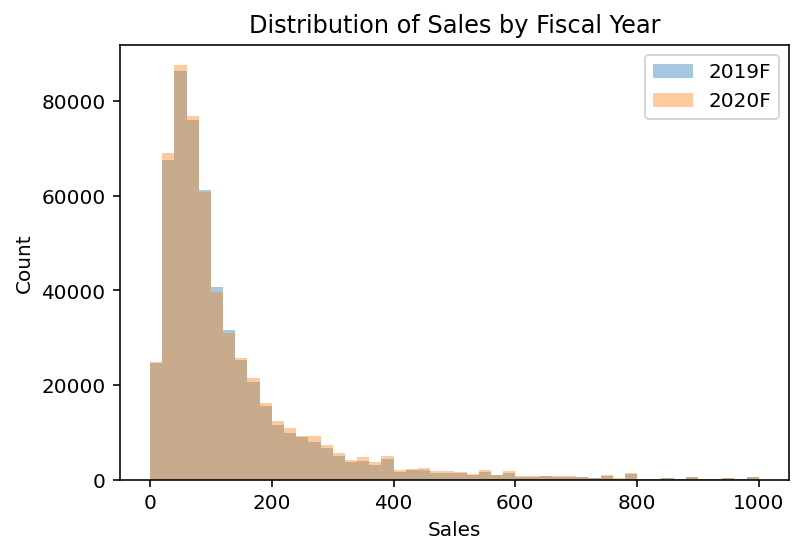

In [89]:
ax = sns.distplot(shoes_2019F['cost'][shoes_2019F['cost'] < 1000], label="2019F", kde=False)
sns.distplot(shoes_2020F['cost'][shoes_2020F['cost'] < 1000], label="2020F", kde=False)
ax.set(xlabel='Sales', ylabel='Count', title='Distribution of Sales by Fiscal Year')
plt.legend()
plt.show();


In [90]:
shoes_2019F.describe()


,quantity,prices,cost
count,"543,675.00","543,675.00","543,675.00"
mean,1.55,94.65,146.60
std,0.86,133.27,254.36
min,1.00,0.01,0.01
25%,1.00,42.00,50.97
50%,1.00,68.02,88.59
75%,2.00,100.00,158.00
max,4.00,"4,270.00","17,080.00"


In [91]:
shoes_2020F.describe()


,quantity,prices,cost
count,"560,150.00","560,150.00","560,150.00"
mean,1.64,94.78,155.35
std,1.00,131.46,268.29
min,1.00,0.01,0.01
25%,1.00,42.00,51.95
50%,1.00,67.99,89.00
75%,2.00,100.00,168.00
max,5.00,"4,270.00","21,350.00"


## Question 12

Looking at the summary, the CEO says the sales don't look that different. 

**(12)** Is the difference in sales statistically significant enough to justify increased bonuses? (Answer using inference, either a significance test or comparison of confidence intervals)

## Answers:

We will perform a t-test for the difference between the sample means for years 2019 and 2020 with a significance level $\alpha$ = .05. 

Our hypotheses:

**H<sub>0</sub>**: $\mu$<sub>2019</sub> - $\mu$<sub>2020</sub> = 0

(there is no difference in mean sales)

**H<sub>a</sub>**: $\mu$<sub>2019</sub> - $\mu$<sub>2020</sub> > 0

(the mean sales in 2020 were greater than in 2019)

Because the p-value of 2.43 is greater than our significance level .05, we do not have convincing evidence against the null hypothesis. The data does not support the claim that the average value of a sale increased from 2019 to 2020.

Because the 95% confidence intervals for mean sales value for 2019 and 2020 have significant overlap, we do not have convincing evidence to support that the average sales value increased from 2019 to 2020.

Thus, there is not enough evidence to support increasing bonuses.


In [92]:
stats.ttest_ind(shoes_2019F['cost'], shoes_2020F['cost'], equal_var=False)


Ttest_indResult(statistic=-17.602040404669047, pvalue=2.428660370325689e-69)

In [93]:
import statsmodels.stats.api as sms
summary_2019 = sms.DescrStatsW(shoes_2019F['cost'])
print(f'The 95% confidence interval for Fiscal Year 2019 shoe sales is: {summary_2019.tconfint_mean()}')
summary_2020 = sms.DescrStatsW(shoes_2020F['cost'])
print(f'The 95% confidence interval for Fiscal Year 2020 shoe sales is: {summary_2020.tconfint_mean()}')


The 95% confidence interval for Fiscal Year 2019 shoe sales is: (145.920341646466, 147.2726131519006)
The 95% confidence interval for Fiscal Year 2020 shoe sales is: (154.65089944198405, 156.0560732260642)
